## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

def build_mlp(input, output=10, units=[256, 128, 128], L2r=0.):
    """Code Here
    建立你的神經網路
    """
    model = Sequential()
    for i, n in enumerate(units):
      if i == 0:
        print(i)
        model.add(Dense(units=n, input_shape=input,kernel_regularizer=regularizers.l2(L2r), activation='relu'))
      else:
        print(i)
        model.add(Dense(units=n, kernel_regularizer=regularizers.l2(L2r), activation='relu'))  
    model.add(Dense(10,activation='softmax'))  

    return model

In [6]:
"""Code Here
設定超參數
"""
batch_size =256
epochs=50

In [9]:

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
l2r = [0, 0.1, 0.01, 0.001]
l2r = [1e-4, 1e-5, 1e-6, 1e-7]
for l2 in l2r:
  model = build_mlp(input=x_train.shape[1:], L2r=l2)
  model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)
  results[l2]={'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

0
1
2
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.9707 - accuracy: 0.3081 - val_loss: 1.8029 - val_accuracy: 0.3795
Epoch 2/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.7428 - accuracy: 0.3924 - val_loss: 1.6896 - val_accuracy: 0.4124
Epoch 3/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.6546 - accuracy: 0.4232 - val_loss: 1.6899 - val_accuracy: 0.4073
Epoch 4/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5905 - accuracy: 0.4439 - val_loss: 1.5754 - val_accuracy: 0.4517
Epoch 5/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5490 - accuracy: 0.4591 - val_loss: 1.6307 - val_accuracy: 0.4288
Epoch 6/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5246 - accuracy: 0.4705 - val_loss: 1.5171 - val_accuracy: 0.4738
Epoch 7/50
50000/50000 [==============================] - 4s 7

Epoch 6/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.4864 - accuracy: 0.4725 - val_loss: 1.5213 - val_accuracy: 0.4616
Epoch 7/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.4675 - accuracy: 0.4800 - val_loss: 1.4957 - val_accuracy: 0.4683
Epoch 8/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.4378 - accuracy: 0.4902 - val_loss: 1.5045 - val_accuracy: 0.4669
Epoch 9/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.4162 - accuracy: 0.4981 - val_loss: 1.4492 - val_accuracy: 0.4882
Epoch 10/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3854 - accuracy: 0.5076 - val_loss: 1.4480 - val_accuracy: 0.4860
Epoch 11/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3721 - accuracy: 0.5143 - val_loss: 1.4858 - val_accuracy: 0.4746
Epoch 12/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3593 - accuracy: 0.5173 - val_loss

50000/50000 [==============================] - 4s 80us/step - loss: 1.3439 - accuracy: 0.5207 - val_loss: 1.4261 - val_accuracy: 0.4999
Epoch 12/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.3215 - accuracy: 0.5290 - val_loss: 1.3897 - val_accuracy: 0.5069
Epoch 13/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.3015 - accuracy: 0.5355 - val_loss: 1.3981 - val_accuracy: 0.5070
Epoch 14/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2826 - accuracy: 0.5430 - val_loss: 1.4686 - val_accuracy: 0.4791
Epoch 15/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2624 - accuracy: 0.5495 - val_loss: 1.3932 - val_accuracy: 0.5080
Epoch 16/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2502 - accuracy: 0.5551 - val_loss: 1.3986 - val_accuracy: 0.5147
Epoch 17/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2326 - accuracy: 0.5606 - val_loss: 1.3800

50000/50000 [==============================] - 4s 80us/step - loss: 1.2623 - accuracy: 0.5520 - val_loss: 1.3912 - val_accuracy: 0.5047
Epoch 17/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2455 - accuracy: 0.5584 - val_loss: 1.3925 - val_accuracy: 0.5151
Epoch 18/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2320 - accuracy: 0.5617 - val_loss: 1.4002 - val_accuracy: 0.5059
Epoch 19/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2212 - accuracy: 0.5669 - val_loss: 1.4005 - val_accuracy: 0.5062
Epoch 20/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.2078 - accuracy: 0.5713 - val_loss: 1.4070 - val_accuracy: 0.5056
Epoch 21/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.1844 - accuracy: 0.5790 - val_loss: 1.3765 - val_accuracy: 0.5204
Epoch 22/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.1635 - accuracy: 0.5858 - val_loss: 1.3786

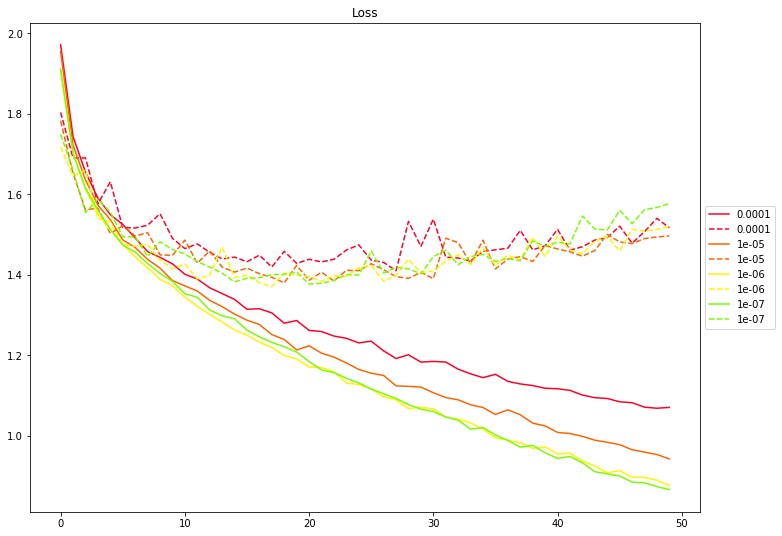

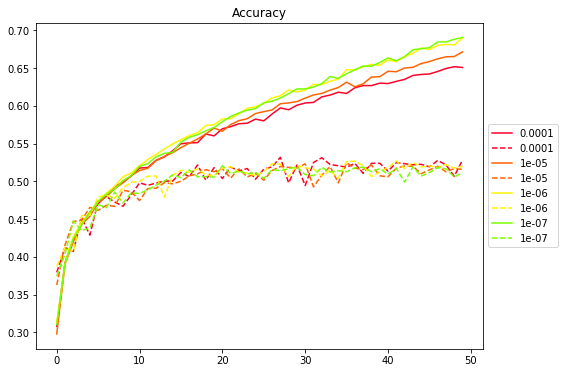

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i*2])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i*2])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i*2])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i*2])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()